<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/%F0%9F%93%8A_Mobil_Uygulama_Kullan%C4%B1c%C4%B1_Davran%C4%B1%C5%9F%C4%B1_Segmentasyonu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚀 Proje Adımları
Simülasyon veri seti oluşturma

Veriyi ön işleme

PCA ile boyut indirgeme (görselleştirme için)

K-Means ile segmentasyon

Segmentleri analiz etme

(İsteğe bağlı) Google Sheets veya Data Studio'ya aktarma

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

sns.set(style="whitegrid")


✅ 2. Örnek Veri Seti Oluştur


In [2]:
np.random.seed(42)

n = 300  # kullanıcı sayısı

data = {
    "sessions": np.random.poisson(10, n),              # oturum sayısı
    "time_spent": np.random.gamma(5, 10, n),            # dakikada geçirilen süre
    "purchases": np.random.binomial(1, 0.3, n),         # satın alma (1: yaptı, 0: yapmadı)
    "device_type": np.random.choice([0, 1], n),         # 0: Android, 1: iOS
}

df = pd.DataFrame(data)
df.head()


,sessions,time_spent,purchases,device_type
0,12,41.853568,0,1
1,6,63.379977,0,0
2,11,41.095678,0,1
3,14,127.253219,1,0
4,7,47.957656,0,1


✅ 3. Veriyi Ölçekle (StandardScaler)



In [3]:
X = df.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


✅ 4. PCA ile Boyut İndirgeme (2 boyuta indir)



In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])


✅ 5. K-Means ile Segmentasyon (örnek: 3 segment)



In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["segment"] = kmeans.fit_predict(X_scaled)
df_pca["segment"] = df["segment"]


✅ 6. Segment Görselleştirme


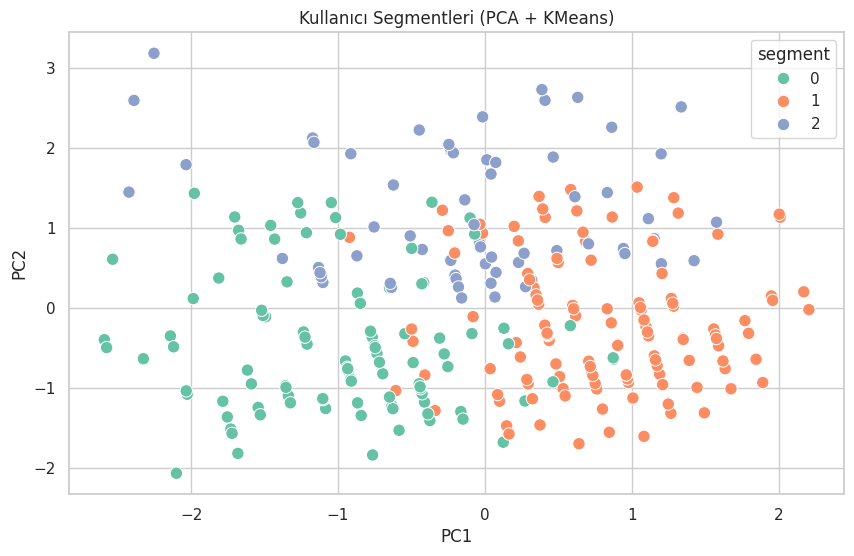

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="segment", palette="Set2", s=80)
plt.title("Kullanıcı Segmentleri (PCA + KMeans)")
plt.show()


✅ 7. Segmentleri Tanımla

In [8]:
segment_summary = df.groupby("segment").mean()
segment_summary


,sessions,time_spent,purchases,device_type
segment,,,,
0,10.990099,42.178363,0.247525,0.00000
1,9.257576,44.886209,0.257576,1.00000
2,8.462687,83.717284,0.343284,0.38806


 1. DBSCAN ile Segmentasyon
DBSCAN (Density-Based Spatial Clustering of Applications with Noise), yoğunluk temelli segmentasyon yapar. Avantajı:

Otomatik olarak “gürültü verileri” (noise/outliers) ayırır.

Küme sayısını önceden vermeye gerek yoktur.

In [9]:
from sklearn.cluster import DBSCAN


🧪 DBSCAN Uygulaması:



In [10]:
# DBSCAN parametreleri
dbscan = DBSCAN(eps=1.3, min_samples=10)
db_labels = dbscan.fit_predict(X_scaled)

# Segment sütunu olarak ekle
df["dbscan_segment"] = db_labels
df_pca["dbscan_segment"] = db_labels


🎯 DBSCAN Küme Görselleştirme (PCA ile)


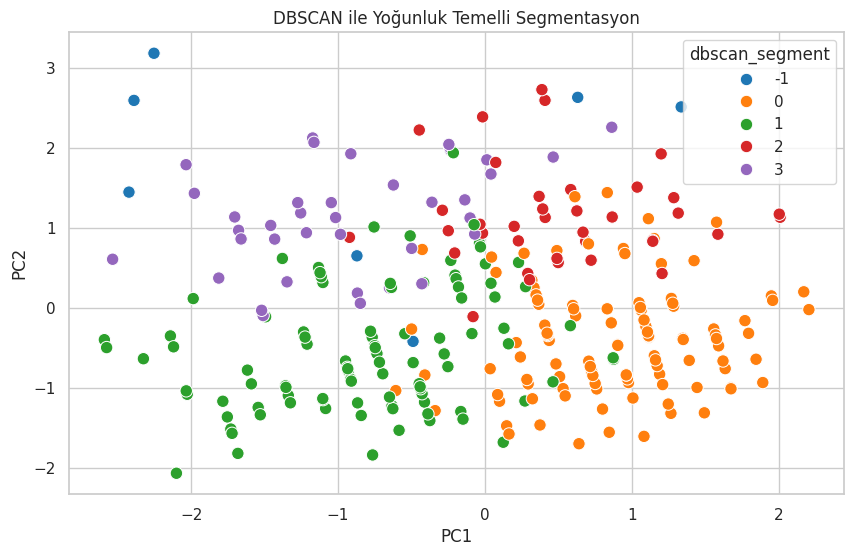

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="dbscan_segment", palette="tab10", s=80)
plt.title("DBSCAN ile Yoğunluk Temelli Segmentasyon")
plt.show()


📊 Segment Analizi (DBSCAN)


In [12]:
df.groupby("dbscan_segment").mean()


,sessions,time_spent,purchases,device_type,segment
dbscan_segment,,,,,
-1,12.714286,94.228525,0.714286,0.571429,1.857143
0,9.095652,51.455038,0.000000,1.000000,1.147826
1,10.207921,50.838091,0.000000,0.000000,0.495050
2,9.512821,52.129991,1.000000,1.000000,1.153846
3,9.526316,53.931748,1.000000,0.000000,0.684211


✅ 2. Dashboard Tarzı Özet Görselleştirme
🧩 Hedef: Her segment için ortalama davranışları “dashboard” gibi özetle

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


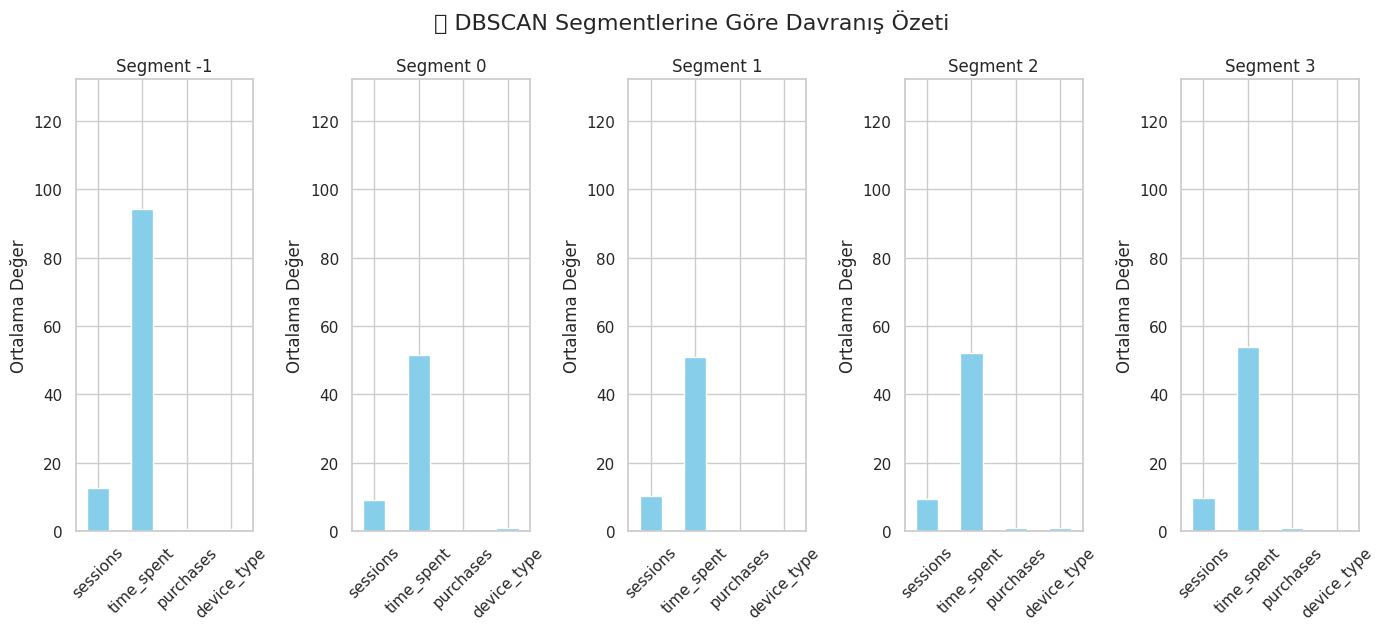

In [13]:
import matplotlib.gridspec as gridspec

segments = df["dbscan_segment"].unique()

plt.figure(figsize=(14, 6))
gs = gridspec.GridSpec(1, len(segments))

for idx, seg in enumerate(sorted(segments)):
    ax = plt.subplot(gs[0, idx])
    segment_data = df[df["dbscan_segment"] == seg][["sessions", "time_spent", "purchases", "device_type"]].mean()
    segment_data.plot(kind="bar", ax=ax, color='skyblue')
    ax.set_title(f"Segment {seg}")
    ax.set_ylim(0, max(df[["sessions", "time_spent"]].max())+5)
    ax.set_ylabel("Ortalama Değer")
    ax.set_xticklabels(segment_data.index, rotation=45)

plt.tight_layout()
plt.suptitle("📊 DBSCAN Segmentlerine Göre Davranış Özeti", fontsize=16, y=1.05)
plt.show()


🎁 Sonuç
DBSCAN ile aykırı kullanıcılar tespit edildi.

Segmentlere göre "ortalama davranış profili" dashboard gibi çizildi.

Her bir kullanıcı grubunu (örneğin “premium aday”, “sadece gezen”, “bot gibi davranan”) kolayca ayırt edebiliriz.